# Proyecto 1
**Integrantes:** Maria Fernanda Rodriguez, Dayana Valentina Gonzalez

**Analisis exploratorio de los datos**

Hay dos archivos:  
* train.csv contiene 81 características extraídas de 21263 superconductores junto con la temperatura crítica en la columna 82.  
* unique_m.csv contiene la fórmula química desglosada para todos los 21263 superconductores del train.csv expediente. Las dos últimas columnas tienen la temperatura crítica y la fórmula química.  

El objetivo aquí es predecir la temperatura crítica en función de las características extraídas.

## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection
from sklearn.datasets import load_digits
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score
#from sklearn.preprocessing import SplineTransformer


import numpy as np
from patsy import dmatrices, dmatrix, demo_data

from time import time

## Base de datos

In [2]:
superconduct = pd.read_csv('train.csv', na_values='?')

superconduct = superconduct.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [3]:
superconduct.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

## Análisis exploratorio de los datos

In [4]:
#superconduct.info() #todos los datos son flotantes o enteros

In [5]:
superconduct.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%            58.041225              35.248990             0.966676   
50%            66.361592              39.918385             1.199541   
75%            78.116681              73.113234             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count             21263.000000       21263.000000           21263.000000   
mean                  1.063884         115.601251              33.225218   
std                   0.401423          54.626887              26.967752   
min                   0.000000           0.000000               0.000000   
25%                   0.775363          78.512902              16.824174   
50%                   1.146783         122.906070              26.636008   
75%                   1.359418         154.119320              38.356908   
max                   1.958203         207.972460             205.589910   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
count     21263.000000  ...      21263.000000   21263.000000   
mean         44.391893  ...          3.153127       3.056536   
std          20.035430  ...          1.191249       1.046257   
min           0.000000  ...          1.000000       1.000000   
25%          32.890369  ...          2.116732       2.279705   
50%          45.123500  ...          2.618182       2.615321   
75%          59.322812  ...          4.026201       3.727919   
max         101.019700  ...          7.000000       7.000000   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
count       21263.000000     21263.000000         21263.000000   21263.000000   
mean            3.055885         1.295682             1.052841       2.041010   
std             1.174815         0.393155             0.380291       1.242345   
min             1.000000         0.000000             0.000000       0.000000   
25%             2.091251         1.060857             0.775678       1.000000   
50%             2.434057         1.368922             1.166532       2.000000   
75%             3.914868         1.589027             1.330801       3.000000   
max             7.000000         2.141963             1.949739       6.000000   

       wtd_range_Valence   std_Valence  wtd_std_Valence  critical_temp  
count       21263.000000  21263.000000     21263.000000   21263.000000  
mean            1.483007      0.839342         0.673987      34.421219  
std             0.978176      0.484676         0.455580      34.254362  
min             0.000000      0.000000         0.000000       0.000210  
25%             0.921454      0.451754         0.306892       5.365000  
50%             1.063077      0.800000         0.500000      20.000000  
75%             1.918400      1.200000         1.020436      63.000000  
max             6.992200      3.000000         3.000000     185.000000  

[8 rows x 82 columns]

In [6]:
superconduct.columns
#82 columnas, la ultima seria la variable predictor

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

C:\Users\dayan\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='critical_temp', ylabel='Density'>

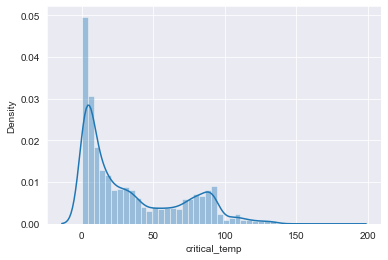

In [7]:
sns.distplot(superconduct['critical_temp'])

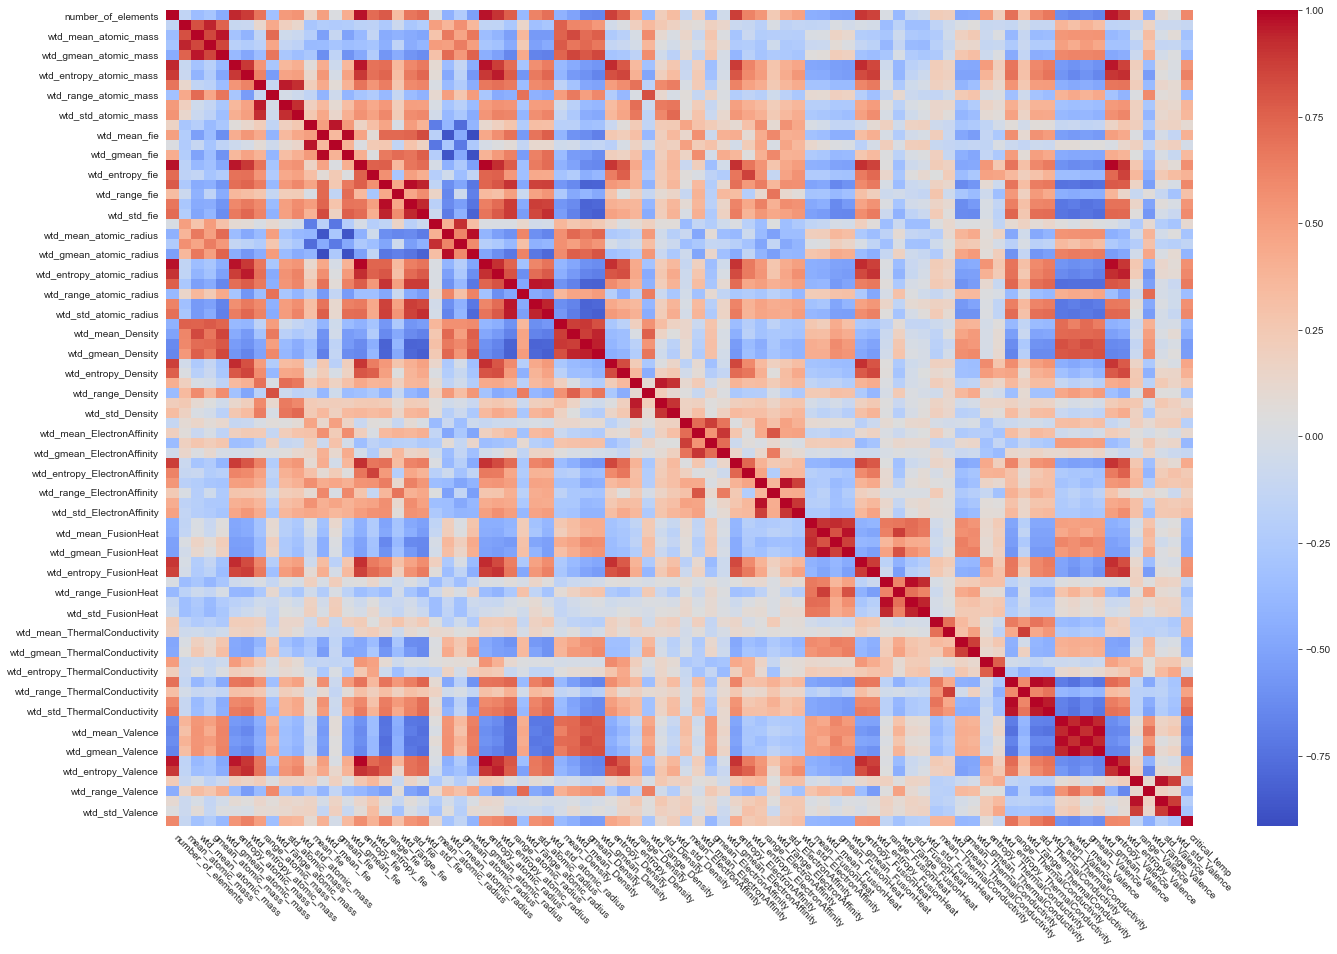

In [8]:
fig,ax = plt.subplots(figsize=(23, 15))
sns.heatmap(superconduct.corr(),cmap='coolwarm',annot=False, fmt="1.3f")
plt.xticks(rotation=-45, ha = 'left') 
plt.show()

**Modelos de regresion multiple (lineal, Ridge, Lasso)**  
**Preguntas:**  
**a)** Al menos uno de los predictores (descriptores) es util en predecir la variable respuesta?  
**b)** Todos los predictores ayudan a explicar la variable respuesta, o tan solo
un conjunto de predictores es util?  
**c)** Que tan bien se ajusta el modelo a los datos?  
**d)** Dado un conjunto de valores para los predictores, Que valor de la variable
respuesta se predice y que tan exacta es la prediccion?  

## Generalidades 

In [9]:
X = superconduct[['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
        'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat',
       'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity',
       'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
       'range_Valence', 'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence']]
y =superconduct['critical_temp']

In [10]:
print(y)

0         29.00
1         26.00
2         19.00
3         22.00
4         23.00
          ...  
21258      2.44
21259    122.10
21260      1.98
21261      1.84
21262     12.80
Name: critical_temp, Length: 21263, dtype: float64


In [50]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


In [12]:
scaler = StandardScaler().fit(X_train) # Estandarizando

## Regresión lineal multiple

In [13]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [14]:
# print the intercept
print(lm.intercept_)

-21.4153752030998


In [15]:
#pd.set_option("max_rows", None)

In [16]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
number_of_elements       -3.884773
mean_atomic_mass          0.788763
wtd_mean_atomic_mass     -0.859352
gmean_atomic_mass        -0.442831
wtd_gmean_atomic_mass     0.591251
...                            ...
wtd_entropy_Valence     -70.697847
range_Valence             4.587992
wtd_range_Valence        -1.089706
std_Valence               7.514072
wtd_std_Valence         -24.900563

[81 rows x 1 columns]

In [17]:
seleccion = feature_selection.f_regression(X_train,y_train)
F, p = seleccion
pd.DataFrame(dict(F = F, p = p),index = X.columns).sort_values(by=["F"],ascending=False)

F             p
wtd_std_ThermalConductivity  13675.347441  0.000000e+00
range_ThermalConductivity    11244.891021  0.000000e+00
std_ThermalConductivity       9402.048200  0.000000e+00
range_atomic_radius           9335.906745  0.000000e+00
wtd_mean_Valence              8525.948477  0.000000e+00
...                                   ...           ...
wtd_mean_ElectronAffinity      158.838187  3.335563e-36
wtd_gmean_ElectronAffinity     143.151040  8.161364e-33
mean_fie                       114.014162  1.674145e-26
entropy_ThermalConductivity     96.391578  1.134180e-22
gmean_fie                       14.247490  1.610007e-04

[81 rows x 2 columns]

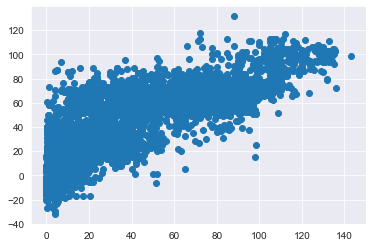

In [18]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

C:\Users\dayan\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


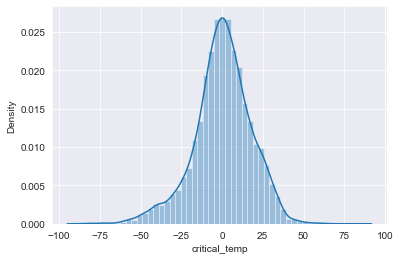

In [19]:
sns.distplot((y_test-predictions),bins=50);

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
n = y_test.shape[0]

R2 = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test,predictions)
RSE = np.sqrt( MSE*n/(n-2) )

print("R^2 = {:1.3f}".format(R2) )
print("RSE = {:1.3f}".format(RSE))

R^2 = 0.735
RSE = 17.699


## Regresion multiple con Ridge

In [21]:
#Generamos un amplio rango de alphas
alphas = 10**np.linspace(10,-2,100)

ridge = Ridge() # Construye el objeto
coefs = []  # lista vacia para almacenar los coeficientes

# Bucle para ajustar sucesivamente el Rige sobre X
for a in alphas:
    ridge.set_params(alpha=a) # utilizando el metodo set_params para cambiar alpha
    ridge.fit(scaler.transform(X_train), y_train)
    coefs.append(ridge.coef_)


In [22]:

#Generamos el alpha con ayuda de validación cruzada
ridgecv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridgecv.fit(scaler.transform(X_train), y_train) # Ajustando al Training set

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.13590727e+00, 4.64158883e+00, 3.51119173e+00, 2.65608778e+00,
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=5, scoring='neg_mean_squared_error')

In [23]:
#Destacamos el mejor alpha
ridgecv.alpha_

0.017475284000076828

In [24]:
pd.set_option("max_rows", None)

In [25]:
sfm = feature_selection.SelectFromModel(ridgecv, max_features=18)
sfm.fit(X_train,y_train)

X_train.columns[sfm.get_support()]

Index(['entropy_atomic_mass', 'entropy_fie', 'wtd_entropy_fie',
       'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'entropy_Density',
       'wtd_entropy_Density', 'wtd_entropy_ElectronAffinity',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat',
       'entropy_ThermalConductivity', 'mean_Valence', 'wtd_mean_Valence',
       'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence',
       'wtd_entropy_Valence', 'wtd_std_Valence'],
      dtype='object')

In [26]:
#Dado ese mejor alpha realizamos la predicciones y 
#el error de prueba obtenido 

ridge2 = Ridge(alpha=ridgecv.alpha_)
ridge2.fit(scaler.transform(X_train), y_train)

Ridge(alpha=0.017475284000076828)

In [27]:
pd.Series(ridge2.coef_, index=X.columns).sort_values(ascending=True)

wtd_gmean_atomic_radius           -93.528835
entropy_fie                       -50.339655
wtd_gmean_Valence                 -31.651436
wtd_mean_atomic_mass              -28.779437
wtd_entropy_Valence               -26.883837
wtd_mean_FusionHeat               -26.157925
range_ElectronAffinity            -22.395319
std_fie                           -20.764450
wtd_gmean_ElectronAffinity        -20.113177
wtd_mean_fie                      -18.734253
range_ThermalConductivity         -15.581183
gmean_FusionHeat                  -14.642920
entropy_atomic_mass               -13.837361
gmean_atomic_mass                 -13.677650
wtd_gmean_ThermalConductivity     -13.480612
mean_Valence                      -13.172253
mean_Density                      -12.923870
std_atomic_mass                   -11.826663
wtd_std_ElectronAffinity          -11.568693
wtd_std_Valence                   -11.342438
wtd_range_ThermalConductivity      -9.296677
std_atomic_radius                  -9.071526
entropy_Fu

In [69]:
predi_ridge = ridge2.predict(scaler.transform(X_test))
R2_ridge = r2_score(y_test,predi_ridge)
MSE2=mean_squared_error(y_test, ridge2.predict(scaler.transform(X_test)))
RSE_ridge = np.sqrt( MSE2*n/(n-2) )
print("R^2_rigde = {:1.3f}".format(R2_ridge) )
print("RSE_rigde = {:1.3f}".format(RSE_ridge))
MSE2

R^2_rigde = 0.735
RSE_rigde = 17.699


313.19036313374187

### Regresión múltiple LASSO

In [29]:
#Generamos un amplio rango de alphas
alphas = 10**np.linspace(10,-2,100)

lasso = Lasso() # Construye el objeto
coefs = []  # lista vacia para almacenar los coeficientes

# Bucle para ajustar sucesivamente el Rige sobre X
for a in alphas:
    ridge.set_params(alpha=a) # utilizando el metodo set_params para cambiar alpha
    ridge.fit(scaler.transform(X_train), y_train)
    coefs.append(ridge.coef_)


In [30]:
# Construccion del objeto LassoCV y ajuste
lassocv = LassoCV(alphas=alphas, cv=5, max_iter=10)
lassocv.fit(X_train, y_train)

C:\Users\dayan\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2713.633011341095, tolerance: 1190.6037165685664
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\dayan\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5282.20254522562, tolerance: 1190.6037165685664
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\dayan\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5497.024288898334, tolerance: 1190.6037165685664
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\dayan\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

C:\Users\dayan\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3053.3297754116356, tolerance: 1198.3556643399947
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\dayan\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5326.83130349312, tolerance: 1198.3556643399947
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\dayan\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5428.801627172157, tolerance: 1198.3556643399947
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\dayan\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

C:\Users\dayan\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2385445.3994614645, tolerance: 1489.5563463264625
  model = cd_fast.enet_coordinate_descent(


LassoCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.13590727e+00, 4.64158883e+00, 3.51119173e+00, 2.65608778e+00,
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=5, max_iter=10)

In [31]:
# Mejor valor de alpha
lassocv.alpha_

0.01

In [32]:
#Realizando el modelo de lasso con el mejor alpha
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(scaler.transform(X_train), y_train)

C:\Users\dayan\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1017843.018285519, tolerance: 1489.5563463264625
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [33]:
predi_lasso = lasso.predict(scaler.transform(X_test))
MSE3 = mean_squared_error(y_test, lasso.predict(scaler.transform(X_test)))
RSE3 = np.sqrt( MSE3*n/(n-2) )
R2_lasso = r2_score(y_test,predi_lasso)
print("R^2_lasso = {:1.3f}".format(R2_lasso) )
print("RSE_lasso = {:1.3f}".format(RSE3))

R^2_lasso = 0.731
RSE_lasso = 17.817


In [34]:
#modelo = LassoCV(cv=10)
sfm = feature_selection.SelectFromModel(lasso, max_features=6)
sfm.fit(X_train,y_train)

X_train.columns[sfm.get_support()]

C:\Users\dayan\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2007119.0455045542, tolerance: 1489.5563463264625
  model = cd_fast.enet_coordinate_descent(


Index(['entropy_atomic_mass', 'wtd_entropy_fie', 'wtd_entropy_atomic_radius',
       'wtd_entropy_ElectronAffinity', 'wtd_entropy_Valence',
       'wtd_std_Valence'],
      dtype='object')

In [35]:
pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=True)

gmean_atomic_radius               -26.949625
range_ElectronAffinity            -22.120076
std_atomic_radius                 -20.721126
wtd_entropy_Valence               -19.766793
wtd_gmean_ElectronAffinity        -19.504124
std_fie                           -18.050170
entropy_atomic_mass               -13.715796
wtd_gmean_ThermalConductivity     -11.815390
wtd_std_ElectronAffinity          -11.194701
range_ThermalConductivity         -11.097850
mean_Density                      -10.231300
wtd_std_Valence                    -8.503988
wtd_gmean_atomic_radius            -7.836117
wtd_range_ThermalConductivity      -7.817071
wtd_mean_FusionHeat                -7.333447
number_of_elements                 -7.017130
wtd_mean_atomic_mass               -6.565725
wtd_entropy_ElectronAffinity       -6.095111
std_atomic_mass                    -5.503350
wtd_entropy_Density                -5.084082
range_FusionHeat                   -5.022809
range_Density                      -4.638723
wtd_range_

## Validación cruzada

### En polinomios y splines.

Antes de realizar los polinomios y Splines realizaremos PCA para tomar las componentes más importantes

In [36]:
pca = PCA() # Se instancia el objeto PCA
X_reduced = pca.fit_transform(scaler.transform(X)) # Se ajusta y transforma

In [37]:
pd.DataFrame(pca.components_).head()

0         1         2         3         4         5         6   \
0 -0.156137  0.051699  0.098470  0.083039  0.119278 -0.146512 -0.156358   
1 -0.094575 -0.226638 -0.200196 -0.217609 -0.184510 -0.124714 -0.084329   
2 -0.072049  0.000206 -0.048235  0.032491 -0.022452 -0.055398 -0.046275   
3 -0.057530  0.184758  0.147126  0.151381  0.108297 -0.060393 -0.046126   
4  0.010352  0.031013 -0.029430 -0.007864 -0.044567 -0.003003  0.000467   

         7         8         9   ...        71        72        73        74  \
0 -0.125285  0.086829 -0.099191  ...  0.140026  0.145387  0.141428  0.147546   
1 -0.080043 -0.116605 -0.066800  ... -0.029657 -0.005822 -0.037124 -0.009647   
2 -0.103878 -0.046672 -0.115280  ... -0.121703 -0.127147 -0.096926 -0.109574   
3  0.072176  0.111774  0.100216  ...  0.104610  0.103541  0.097899  0.102341   
4  0.088971  0.042238  0.109978  ... -0.024477 -0.030922 -0.005083 -0.013546   

         75        76        77        78        79        80  
0 -0.159115 -0.156060 -0.026235  0.107859 -0.008389  0.003603  
1 -0.093244 -0.083398  0.014294 -0.011175  0.024256  0.019988  
2 -0.068129 -0.101421 -0.226714 -0.045204 -0.211337 -0.232145  
3 -0.053517 -0.046718  0.018544  0.061823  0.035115  0.017627  
4  0.030812 -0.017231 -0.137578  0.059401 -0.121336 -0.163425  

[5 rows x 81 columns]

In [38]:
porcentaje_var_acumulada = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(porcentaje_var_acumulada)

[38.98 49.43 58.95 66.83 72.73 76.53 80.16 83.26 85.61 87.58 89.4  90.86
 92.04 93.04 94.02 94.8  95.52 96.06 96.54 96.92 97.22 97.51 97.77 97.98
 98.18 98.37 98.54 98.68 98.81 98.92 99.02 99.12 99.21 99.28 99.35 99.41
 99.47 99.52 99.56 99.6  99.63 99.66 99.69 99.71 99.73 99.75 99.77 99.79
 99.81 99.83 99.85 99.87 99.88 99.89 99.9  99.91 99.92 99.93 99.94 99.95
 99.96 99.97 99.97 99.97 99.97 99.97 99.97 99.97 99.97 99.97 99.97 99.97
 99.97 99.97 99.97 99.97 99.97 99.97 99.97 99.97 99.97]


Tomaremos las componentes principales que expliquen el 90% de la varianza acomulada.

In [39]:
np.where(porcentaje_var_acumulada<91)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64),)

In [89]:
print(X_reduced.shape)
XNew = pd.DataFrame(X_reduced[:,:2], columns = ['C0','C1'] )
XNew

(21263, 81)


C0         C1
0      -3.655503   1.097062
1      -4.550903  -0.154523
2      -3.479860   1.163367
3      -3.572623   1.126862
4      -3.800080   1.051547
5      -4.027194   0.996943
6      -4.251411   0.922247
7      -3.358266   1.481767
8      -3.441570   1.450787
9      -3.516640   1.425697
10     -3.649136   1.387888
11     -4.944248  -0.568065
12     -4.464703  -0.070172
13     -4.550903  -0.154523
14     -4.704229  -0.315626
15     -4.782357  -0.412789
16     -5.010100  -0.005676
17     -3.572623   1.126862
18     -3.441570   1.450787
19     -3.262485   1.521903
20     -3.358266   1.481767
21     -3.551750   1.414854
22     -3.585459   1.404992
23     -3.649136   1.387888
24     -3.708392   1.373876
25     -3.763729   1.362603
26     -3.479979   1.437629
27     -3.445569   1.671500
28      1.875343  -2.947560
29     -2.029500  -1.558556
30      0.281488  -2.748769
31     -3.486611  -3.913502
32     -3.475215  -0.150450
33     -3.475215  -0.150450
34     -3.518012  -0.648110
35     -3.532430  -0.760975
36     -3.485096  -0.759993
37     -3.422864  -0.748803
38     -3.341471  -0.726293
39     -4.122126   0.875433
40     -2.203694  -1.283570
41     -4.292538   1.408315
42     -4.282097   1.349276
43     -4.209745   1.209121
44     -3.480160  -0.611834
45     -4.371146   1.093897
46     -4.404167   1.024113
47     -4.411970   0.964370
48     -4.399620   1.053268
49     -4.392131   1.117495
50     -4.420268   1.029462
51     -4.399173   1.040762
52     -1.757985  -2.013951
53     -2.226314  -1.946913
54     -1.818537  -2.188149
55     -2.203694  -1.283570
56     -4.202611   1.543230
57     -2.864296  -0.997414
58     -3.185188  -0.648579
59     -4.841558  -0.464494
60     -3.441570   1.450787
61     -3.017699  -3.015770
62     -3.708392   1.373876
63     -3.475215  -0.150450
64     -4.450734   0.964823
65     -3.421005   0.954211
66     -4.002356   2.221206
67     -3.572623   1.126862
68     -3.441570   1.450787
69     -4.053655   0.596856
70     -3.926940   0.735824
71     -3.928394   0.660375
72     -4.024612   0.575054
73     -4.131998   0.471531
74     -4.105786   0.514829
75     -4.175218   0.568996
76     -4.179954   0.633876
77     -4.312612  -0.212428
78     -4.250092  -0.148904
79     -4.330079  -0.259950
80     -4.338202  -0.236266
81     -4.761490   0.139161
82     -4.865832   0.062075
83     -4.640448   0.231221
84     -4.676489   0.203515
85     -4.735887   0.158299
86     -4.124771   1.149288
87     -5.154376   1.030896
88     -5.896142   1.903317
89     -4.124771   1.149288
90     -4.124771   1.149288
91     -4.233799   0.607202
92     -4.124771   1.149288
93     -4.124771   1.149288
94     -4.124771   1.149288
95     -4.124771   1.149288
96     -4.303817   0.853013
97     -4.803004  -0.350820
98     -4.124771   1.149288
99     -4.124771   1.149288
100    -4.124771   1.149288
101    -4.865423   0.167572
102    -4.394480   0.994502
103    -4.375073   0.990517
104    -4.293946   2.169902
105    -4.288855   0.993746
106    -4.226204   1.001000
107    -4.152199   1.017715
108    -4.337765   0.990009
109    -4.235060   1.547410
110    -4.205310   1.128683
111    -2.891393  -0.748080
112    -2.246575  -1.822617
113    -2.253250  -1.888233
114    -2.262700  -1.913523
115    -4.117048   1.126324
116    -2.310052  -1.808755
117    -2.321278  -1.893384
118    -2.314060  -1.181374
119    -2.357929  -1.966838
120    -4.124771   1.149288
121    -4.886742   0.174337
122    -4.803457   0.363265
123    -4.844479   0.330404
124    -3.441570   1.450787
125    -4.057307   0.641343
126    -4.106510   0.599179
127    -4.851948   0.324474
128    -4.859226   0.318710
129    -4.866329   0.313096
130    -4.869819   0.310343
131    -4.899438   0.287319
132    -4.124771   1.149288
133    -4.109060   1.103020
134    -4.229014   0.691910
135    -5.187795   2.075383
136    -5.299188   2.065931
137    -5.445112   2.088042
138    -4.235060   1.547410
139    -4.208648   0.701167
140    -4.240205   0.626161
141    -4.227389   0.503461
142    -4.

### Polinomios

In [90]:
X4 = PolynomialFeatures(degree=2).fit_transform(XNew)

In [91]:
poly4 = sm.GLS(y, X4).fit()
poly4.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### Splines

In [43]:
X2 = pd.get_dummies(XNew,drop_first=True)


In [44]:
x_train, x_test, Y_train, Y_test = train_test_split(X2, y, test_size=0.4, random_state=101)

In [93]:
deg=4 # Grados de libertad

#Definicion de la transformacion
transformacion = dmatrix(
    f"te(cr(x_train.C0, df={deg}),cr(x_train.C1, df={deg}))", # se definen los splines
                           {"x_train.C0": x_train.C0,"x_train.C1": x_train.C1} # Se definen los datos
)

model_spline = sm.GLM(Y_train, transformacion).fit() # Train

# Prediccion
prediccion = model_spline.predict(
    dmatrix(f"te(cr(x_test.C0, df={deg}),cr(x_test.C1, df={deg}))", # Splines
            {"x_test.C0": x_test.C0,"x_test.C1": x_test.C1  })
)

print("El RMSE es:",np.sqrt(mean_squared_error(Y_test, prediccion)) )
print("El R2:",r2_score(Y_test, prediccion) )

El RMSE es: 22.55690623671647
El R2: 0.5693448473471419


**Conclusiones**  
Concluir con las observaciones generadas a traves del analisis, creacion y evaluacion de los modelos construidos.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ab22eaaf-06f3-405f-9fcb-14fedb95aa5f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>